In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import optuna
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from scipy.optimize import minimize
# Load datasets
train_df = pd.read_csv("train[1].csv")
test_df = pd.read_csv("test[1].csv")

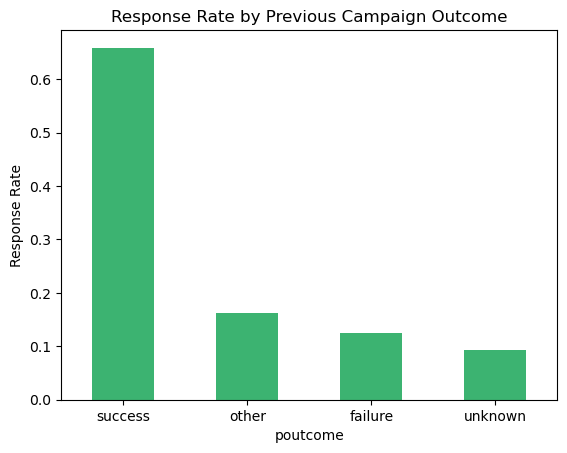

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16940\2889159095.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='previous_contacted', y='Target', palette='coolwarm')


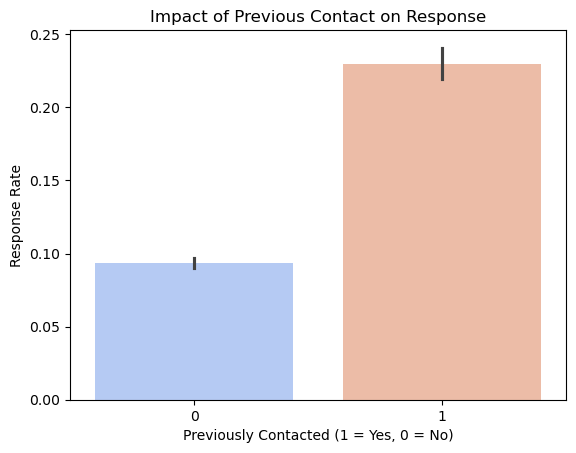

In [8]:
# 1. Poutcome vs Response Rate
poutcome_response = train_df.groupby('poutcome')['Target'].mean().sort_values(ascending=False)
poutcome_response.plot(kind='bar', color='mediumseagreen')
plt.title("Response Rate by Previous Campaign Outcome")
plt.ylabel("Response Rate")
plt.xticks(rotation=0)
plt.show()

#2. Has Contacted Before (Binary Feature)
train_df['previous_contacted'] = (train_df['pdays'] != -1).astype(int)
sns.barplot(data=train_df, x='previous_contacted', y='Target', palette='coolwarm')
plt.title("Impact of Previous Contact on Response")
plt.xlabel("Previously Contacted (1 = Yes, 0 = No)")
plt.ylabel("Response Rate")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16940\2034011060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='balance_bin', y='Target', palette='viridis')


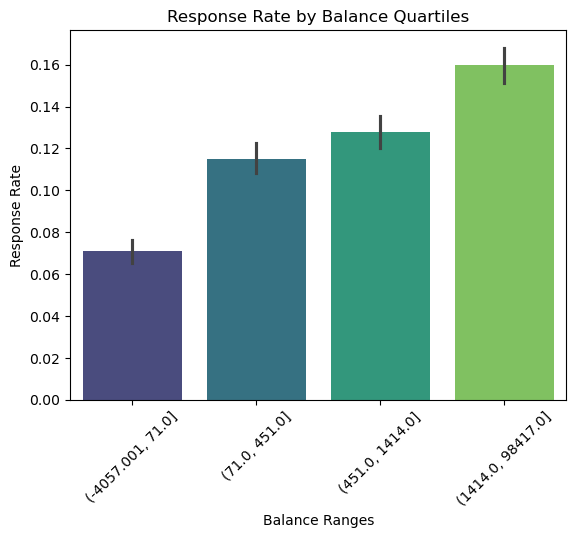

In [11]:
#Balance vs Response Rate (Binned)

train_df['balance_bin'] = pd.qcut(train_df['balance'], q=4)
sns.barplot(data=train_df, x='balance_bin', y='Target', palette='viridis')
plt.title("Response Rate by Balance Quartiles")
plt.ylabel("Response Rate")
plt.xlabel("Balance Ranges")
plt.xticks(rotation=45)
plt.show()


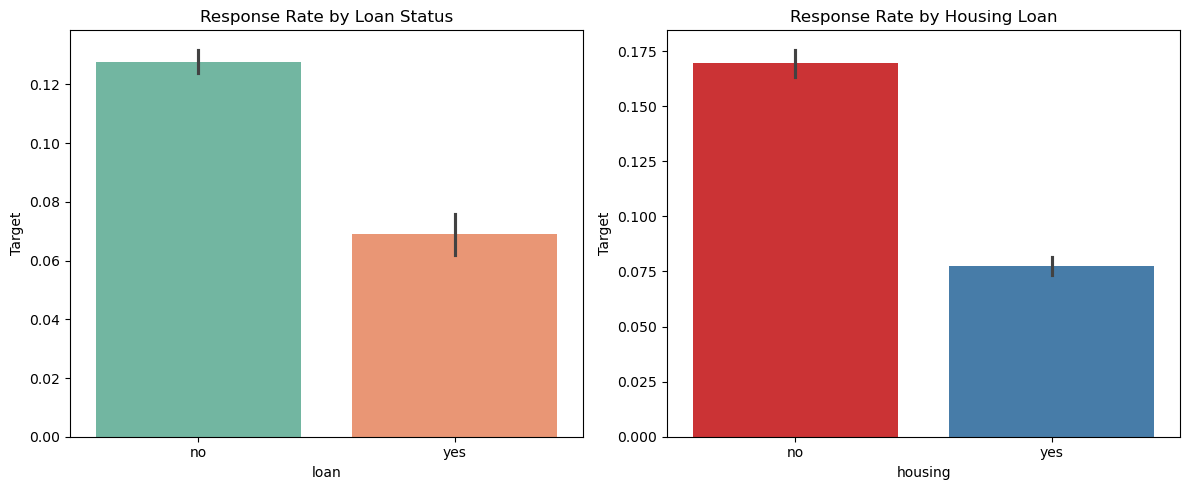

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=train_df, x='loan', y='Target', hue='loan', palette='Set2', ax=axes[0], legend=False)
axes[0].set_title("Response Rate by Loan Status")

sns.barplot(data=train_df, x='housing', y='Target', hue='housing', palette='Set1', ax=axes[1], legend=False)
axes[1].set_title("Response Rate by Housing Loan")

plt.tight_layout()
plt.show()
